**<font size="4">1. What is the range of accepted SAT/ACT scores for student athletes?</font>**

In [29]:
#Step 1: Load the data that have either SAT or ACT scores
#For reference on how the data is separated, please see "[BU Athletics] General Data Cleaning"
import pandas as pd
df = pd.read_csv('students_with_ACT_SAT_scores.csv')
df.head()

,Student ID & Name,Student Athletic Team 1,Applied To Year Semester,Student Domestic/International Status,Student World Region of Citizenship,Student Home Admission Publication Region,Student Home State,Student Gender,Student IPEDS Race Ethnicity,Student Degree Level,...,Semester 8 GPI,Semester 8 Cum GPA,Semester 9 GPI,Semester 9 Cum GPA,Semester 10 GPI,Semester 10 Cum GPA,Semester 11 GPI,Semester 11 Cum GPA,Semester 12 GPI,Semester 12 Cum GPA
0,1,Ping Pong,"Fall, 2021",Domestic,Unknown,Midwest,Watermelon,Female,White,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,Sailing,"Fall, 2021",Domestic,Unknown,Midwest,Pineapple,Male,White,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,Polo,"Spring, 2022",Domestic,Unknown,West,Apple,Female,White,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,Beach Volleyball,"Fall, 2021",Domestic,Unknown,South,Kale,Female,White,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,Bowling,"Fall, 2021",International,Wheat,Unknown,Unknown,Female,U.S. Nonresident,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#Step 2: Identify the columns that contain SAT/ACT scores
sat = 'Average SAT Highest Composite Score (Applicants Wanting Test Scores Considered)'
act = 'Average ACT Highest Composite Score (Applicants Wanting Test Scores Considered)'

#Step 3: Calculate the range for SAT and ACT scores
sat_range = (df[sat].dropna().min(), df[sat].dropna().max())
act_range = (df[act].dropna().min(), df[act].dropna().max())

#Step 4: Print the result
print(f'The range of accepted SAT scores: {sat_range}')
print(f'The range of accepted ACT scores: {act_range}')

The range of accepted SAT scores: (980.0, 1570.0)
The range of accepted ACT scores: (22.0, 35.0)


**<font size="4">1.1 How does the SAT/ACT scores distribute among all accepted students?</font>**

**<font size="3">The Distribution of ACT Scores</font>**<br><br>
The following information is based on: https://www.quadeducationgroup.com/blog/understanding-your-act-score-average-good-highest-act-scores<br><br>
In 2024, the **national average** ACT score is **19.9**, meaning all accepted BU athletes with ACT scores were above the national average.

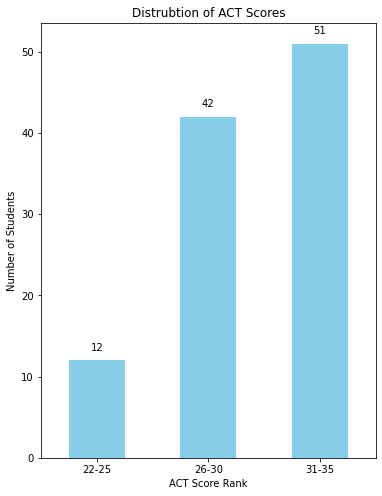

In [31]:
import matplotlib.pyplot as plt

#For ACT scores
#Step 1: Define bins for the ranges and categorize the data
bins = [21, 25, 30, 35]
labels = ['22-25', '26-30', '31-35']
df['ACT_range'] = pd.cut(df[act].dropna(), bins=bins, labels=labels, include_lowest=True)

#Step 2: Plot the distribution of ACT socres
plt.figure(figsize=(6, 8))
act_distribution = df['ACT_range'].value_counts(sort=False)
ax = act_distribution.plot(kind='bar', color='skyblue')

#Step 3: Add actual number of students on top of each bar
for i, count in enumerate(act_distribution):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')

#Step 4: Add Title and Labels to the plot
plt.title('Distrubtion of ACT Scores')
plt.xlabel('ACT Score Rank')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)

plt.show()

Box Plot For ACT Scores

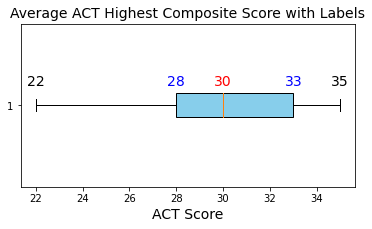

In [35]:
# Step 1: Calculate the summary statistics for the ACT scores
act_scores = df[act].dropna()

min_val = act_scores.min()
q1 = act_scores.quantile(0.25)
median = act_scores.median()
q3 = act_scores.quantile(0.75)
max_val = act_scores.max()

# Step 2: Plot the Box Plot for Average ACT Highest Composite Score
plt.figure(figsize=(6, 3))
box = plt.boxplot(act_scores, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))

# Step 3: Label the min, max, Q1, median (Q2), and Q3
label_offset = 0.1  # Move the labels upward by 0.1
font_size = 14 
plt.text(min_val, 1 + label_offset, f'{int(min_val)}', ha='center', va='bottom', color='black', fontsize=font_size)
plt.text(q1, 1 + label_offset, f'{int(q1)}', ha='center', va='bottom', color='blue', fontsize=font_size)
plt.text(median, 1 + label_offset, f'{int(median)}', ha='center', va='bottom', color='red', fontsize=font_size)
plt.text(q3, 1 + label_offset, f'{int(q3)}', ha='center', va='bottom', color='blue', fontsize=font_size)
plt.text(max_val, 1 + label_offset, f'{int(max_val)}', ha='center', va='bottom', color='black', fontsize=font_size)

# Step 4: Add title and labels
plt.title('Average ACT Highest Composite Score with Labels', fontsize=14)
plt.xlabel('ACT Score', fontsize=14)

plt.show()

**<font size="3">The Distribution of SAT Scores</font>**<br><br>
The following information is based on: https://www.appily.com/guidance/articles/college-admission-tests/what-is-a-good-SAT-score#:~:text=Understanding%20your%20SAT%20score,-Comparing%20the%20percentile&text=This%20average%20lands%20at%20the,95th%20percentile%20is%201520.<br><br>
In 2024, the **average** composite SAT score is **1050** (**50th** percentile), the **75th** percentile is **1200**, the **90th** percentile is **1440**, and the **95th** percentile is **1520**.

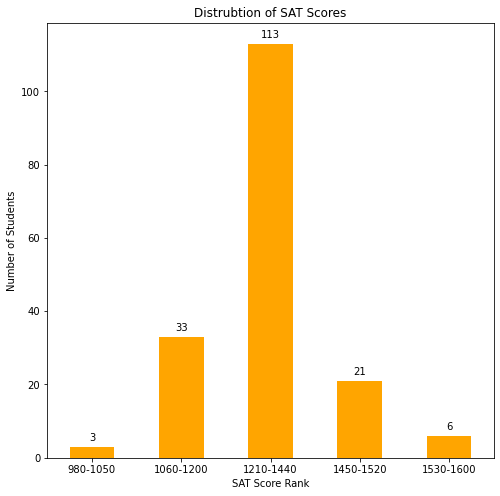

In [36]:
#For SAT scores
#Step 1: Define bins for the ranges and categorize the data
bins = [981, 1050, 1200, 1440, 1520, 1600]
labels = ['980-1050', '1060-1200', '1210-1440', '1450-1520', '1530-1600']
df['SAT_range'] = pd.cut(df[sat].dropna(), bins=bins, labels=labels, include_lowest=True)

#Step 2: Plot the distribution of SAT socres
plt.figure(figsize=(8, 8))
sat_distribution = df['SAT_range'].value_counts(sort=False)
ax = sat_distribution.plot(kind='bar', color='orange')

#Step 3: Add actual number of students on top of each bar
for i, count in enumerate(sat_distribution):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')

#Step 4: Add Title and Labels to the plot
plt.title('Distrubtion of SAT Scores')
plt.xlabel('SAT Score Rank')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)

plt.show()

Box Plot for SAT Scores

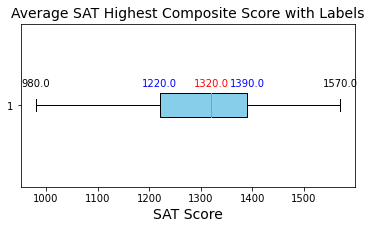

1308.870056497175


In [39]:
# Step 1: Calculate the summary statistics for the ACT scores
sat_scores = df[sat].dropna()

min_val = sat_scores.min()
q1 = sat_scores.quantile(0.25)
median = sat_scores.median()
q3 = sat_scores.quantile(0.75)
max_val = sat_scores.max()
average = sat_scores.mean()

# Step 2: Plot the Box Plot for Average ACT Highest Composite Score
plt.figure(figsize=(6, 3))
box = plt.boxplot(sat_scores, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))

# Step 3: Label the min, max, Q1, median (Q2), and Q3
label_offset = 0.1  # Move the labels upward by 0.1
font_size = 14 
plt.text(min_val, 1 + label_offset, f'{min_val}', ha='center', va='bottom', color='black')
plt.text(q1, 1 + label_offset, f'{q1}', ha='center', va='bottom', color='blue')
plt.text(median, 1 + label_offset, f'{median}', ha='center', va='bottom', color='red')
plt.text(q3, 1 + label_offset, f'{q3}', ha='center', va='bottom', color='blue')
plt.text(max_val, 1 + label_offset, f'{max_val}', ha='center', va='bottom', color='black')

# Step 4: Add title and labels
plt.title('Average SAT Highest Composite Score with Labels', fontsize=14)
plt.xlabel('SAT Score', fontsize=14)

plt.show()
print(average)

**<font size="4">2. What is the range of accepted highschool GPA for student athletes?</font>**

In [17]:
#Step 1: Load the data that have highschool GPA
#For reference on how the data is separated, please see "[BU Athletics] General Data Cleaning"
df_2 = pd.read_csv('data_with_high_school_gpa.csv')
df_2.head()

,Student ID & Name,Student Athletic Team 1,Applied To Year Semester,Student Domestic/International Status,Student World Region of Citizenship,Student Home Admission Publication Region,Student Home State,Student Gender,Student IPEDS Race Ethnicity,Student Degree Level,...,Semester 8 GPI,Semester 8 Cum GPA,Semester 9 GPI,Semester 9 Cum GPA,Semester 10 GPI,Semester 10 Cum GPA,Semester 11 GPI,Semester 11 Cum GPA,Semester 12 GPI,Semester 12 Cum GPA
0,1,Ping Pong,"Fall, 2021",Domestic,Unknown,Midwest,Watermelon,Female,White,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Quidditch,"Fall, 2023",Domestic,Unknown,Pacific,Broccoli,Male,Asian,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Ping Pong,"Fall, 2022",Domestic,Unknown,New England,Grapefruit,Female,Hispanic/Latino,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Bowling,"Fall, 2022",Domestic,Unknown,Mid-Atlantic,Lemon,Female,White,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,Curling,"Fall, 2023",Domestic,Unknown,Mid-Atlantic,Blueberry,Male,African American or Black,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Step 2: Identify the columns that contain highschool GPA
highschool_gpa = 'Average Undergraduate Applicant High School GPA'

#Step 3: Calculate the range for highschool GPA
highschool_gpa_range = (df_2[highschool_gpa].dropna().min(), df_2[highschool_gpa].dropna().max())

#Step 4: Print the result
print(f'The range of accepted highschool GPA: {highschool_gpa_range}')

The range of accepted highschool GPA: (2.3, 4.3)


**<font size="4">2.1 How does the highschool GPA distribute among all accepted students?</font>**

The following information is based on: https://bigfuture.collegeboard.org/plan-for-college/get-started/how-to-convert-gpa-4.0-scale<br>

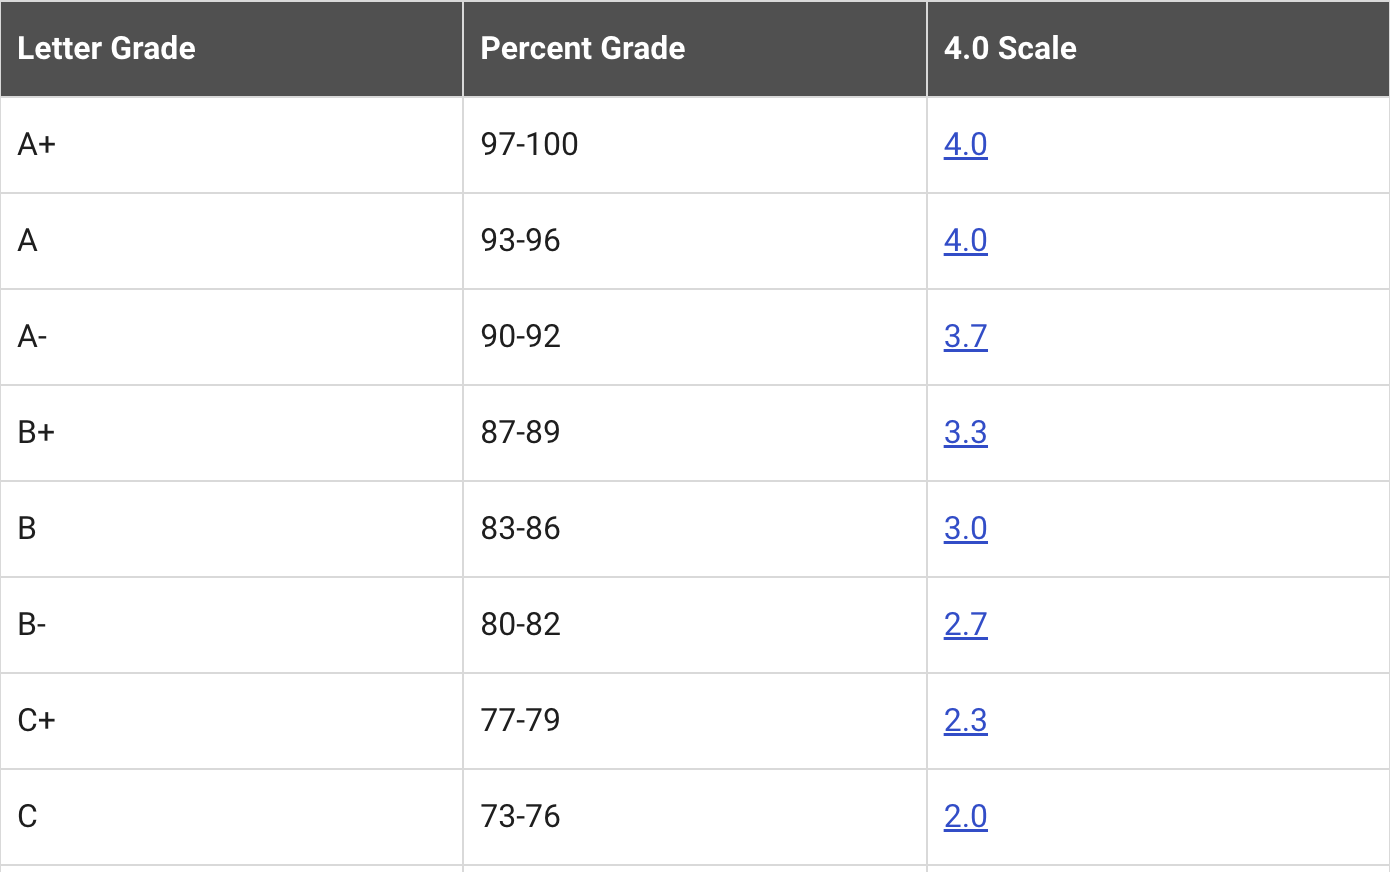

In [23]:
from IPython.display import Image
Image(filename='GPA_Scale.png')

Based on the image above, all the athletic students admitted to BU have a highschool GPA above C. To visualize the distribution of all students' highschool GPA, the data will be categorized into 6 ranks: **C+ (2.3-2.7), B- (2.7-3.0), B (3.0-3.3), B+ (3.3-3.7), A- (3.7-4.0), A(4.0), A+ (4.0+)**.<br>
It should be clearified that the rank **A+** is only feasible for students enrolled in programs like AP, which has a **weighted 5.0 scale** for GPA.

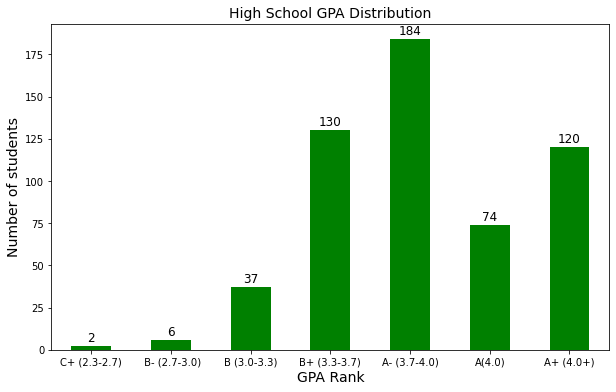

In [41]:
#Step 1: Define bins for the ranges and categorize the data
bins = [2.3, 2.7, 3.0, 3.3, 3.7, 4.0, 4.1, 4.5]
labels = ['C+ (2.3-2.7)', ' B- (2.7-3.0)', 'B (3.0-3.3)', 'B+ (3.3-3.7)', 'A- (3.7-4.0)', 'A(4.0)', 'A+ (4.0+)']
df_2['highschool_GPA_Rank'] = pd.cut(df_2[highschool_gpa], bins=bins, labels=labels, 
                                     include_lowest=True, right=False)

#Step 2: Count the number of students in each category
high_school_gpa_distribution = df_2['highschool_GPA_Rank'].value_counts(sort=False)

#Step 3: Plot the distribution
plt.figure(figsize=(10, 6))
high_school_gpa_distribution.plot(kind='bar', color='green')

#Step 4: Display the actual number of students on top of each bar
for i, count in enumerate(high_school_gpa_distribution):
    plt.text(i, count+1, str(count), ha='center', va='bottom', fontsize=12)

#Step 5: Add labels and title
plt.title('High School GPA Distribution', fontsize=14)
plt.xlabel('GPA Rank', fontsize=14)
plt.ylabel('Number of students', fontsize=14)
plt.xticks(rotation=0)
plt.show()

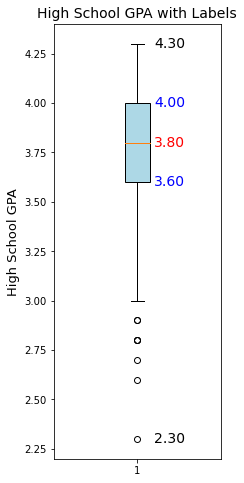

In [43]:
highschool_gpa_values = df_2[highschool_gpa].dropna()

min_val = highschool_gpa_values.min()
q1 = highschool_gpa_values.quantile(0.25)
median = highschool_gpa_values.median()
q3 = highschool_gpa_values.quantile(0.75)
max_val = highschool_gpa_values.max()

# Step 5: Plot the Box Plot for High School GPA
plt.figure(figsize=(3, 8))
box = plt.boxplot(highschool_gpa_values, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Step 6: Label the min, max, Q1, median (Q2), and Q3
label_offset = 0.1  # Offset to move labels slightly to the right
font_size = 14  # Set font size for labels

plt.text(1 + label_offset, min_val, f'{min_val:.2f}', ha='left', va='center', color='black', fontsize=font_size)
plt.text(1 + label_offset, q1, f'{q1:.2f}', ha='left', va='center', color='blue', fontsize=font_size)
plt.text(1 + label_offset, median, f'{median:.2f}', ha='left', va='center', color='red', fontsize=font_size)
plt.text(1 + label_offset, q3, f'{q3:.2f}', ha='left', va='center', color='blue', fontsize=font_size)
plt.text(1 + label_offset, max_val, f'{max_val:.2f}', ha='left', va='center', color='black', fontsize=font_size)
# Step 7: Add title and labels
plt.title('High School GPA with Labels', fontsize=14)
plt.ylabel('High School GPA', fontsize=13)
plt.show()

**<font size="4">3. What percentage of these student athletes are domestic students? What about international students?</font>**

In [22]:
#Step 1: Load the general cleaned data
#For reference on how the data is separated, please see "[BU Athletics] General Data Cleaning"
df_3 = pd.read_csv('cleaned_data.csv')
df_3.head()

,Student ID & Name,Student Athletic Team 1,Applied To Year Semester,Student Domestic/International Status,Student World Region of Citizenship,Student Home Admission Publication Region,Student Home State,Student Gender,Student IPEDS Race Ethnicity,Student Degree Level,...,Semester 8 GPI,Semester 8 Cum GPA,Semester 9 GPI,Semester 9 Cum GPA,Semester 10 GPI,Semester 10 Cum GPA,Semester 11 GPI,Semester 11 Cum GPA,Semester 12 GPI,Semester 12 Cum GPA
0,1,Ping Pong,"Fall, 2021",Domestic,Unknown,Midwest,Watermelon,Female,White,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Quidditch,"Fall, 2023",Domestic,Unknown,Pacific,Broccoli,Male,Asian,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Ping Pong,"Fall, 2022",Domestic,Unknown,New England,Grapefruit,Female,Hispanic/Latino,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Bowling,"Fall, 2022",Domestic,Unknown,Mid-Atlantic,Lemon,Female,White,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Roller Derby,"Fall, 2023",Domestic,Unknown,New England,Plum,Male,White,MASTERS,...,3.5,3.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


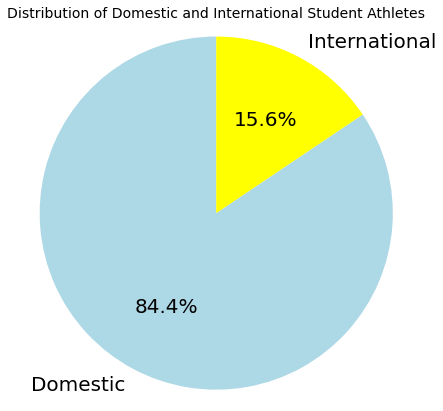

In [28]:
#Step 2: Define the Domestic/International Status
nationality_status = 'Student Domestic/International Status'

#Step 3: Count the number of domestic and international students
counts = df_3[nationality_status].value_counts()

#Step 4: Plot the data using a pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    counts, 
    labels=counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightblue', 'yellow'], 
    textprops={'fontsize': 20}  # Set font size for labels
)
plt.title('Distribution of Domestic and International Student Athletes', fontsize=14)
plt.axis('equal')
plt.show()

In [26]:
#Step 5: Print the actual number of domestic and international students
print("Number of Domestic Students:", counts.get('Domestic', 0))
print("Number of International Students:", counts.get('International', 0))

Number of Domestic Students: 526
Number of International Students: 97


**<font size="4">4. Does English being the primary language of the country impact the students' performance?</font>**

For this question, we will separate the data for domestic students and international students (the detailed method is listed in [BU Athletics] General Data Cleaning). Then, we will compare the range, mean, median of BU GPA between domestic and international students. Besides, based on the GPA Scale listed in 2.1, we will compare the percentage of each GPA rank between domestic and international students.

In [44]:
#Step 1: Load the data
df_4 = pd.read_csv('Domestic_student_data.csv')
df_5 = pd.read_csv('International_student_data.csv')
df_4.head()
df_5.head()

,Student ID & Name,Student Athletic Team 1,Applied To Year Semester,Student Domestic/International Status,Student World Region of Citizenship,Student Gender,Student Degree Level,Enrollment College,Primary College Degree Program,Primary Enrollment HEGIS,...,Semester 8 GPI,Semester 8 Cum GPA,Semester 9 GPI,Semester 9 Cum GPA,Semester 10 GPI,Semester 10 Cum GPA,Semester 11 GPI,Semester 11 Cum GPA,Semester 12 GPI,Semester 12 Cum GPA
0,13,Bowling,"Fall, 2021",International,Wheat,Female,UNDERGRAD,CAS,Bachelor of Arts,2204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19,Curling,"Spring, 2024",International,Wheat,Male,UNDERGRAD,CAS,Bachelor of Arts,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,Curling,"Fall, 2021",International,Ciabatta,Male,UNDERGRAD,QST,Bachelor of Science in Business Administration,506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34,Squash,"Fall, 2021",International,Sourdough,Female,UNDERGRAD,COM,Bachelor of Science,608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37,Curling,"Fall, 2023",International,Wheat,Male,UNDERGRAD,ENG,Bachelor of Science,909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**<font size="4">4.1 Range, Mean, Median Comparison</font>**

In [45]:
#Step 2: Define the columns for cumulative GPA (latest current cumulative GPA based on class year)
cumulative_gpa_columns = [f'Semester {i} Cum GPA' for i in range(1, 13)]

#Step 3: Define a function to get the latest cumulative GPA (last non-null value in each row)
def get_latest_cum_gpa(row):
    for col in reversed(cumulative_gpa_columns):
        if pd.notna(row[col]):
            return row[col]
    return None

#Step 4: Apply the function to get the latest GPA for domestic and international students
df_4['Latest_Cum_GPA'] = df_4.apply(get_latest_cum_gpa, axis=1)
df_5['Latest_Cum_GPA'] = df_5.apply(get_latest_cum_gpa, axis=1)

#Step 5: For each set, group by "class year" and calculate the mean, median, and range for cumulative GPA
def gpa_by_class_year(df, class_year_column='Class Year Category'):
    grouped = df.groupby(class_year_column)['Latest_Cum_GPA']
    
    for class_year, gpa_group in grouped:
        gpa_list = gpa_group.dropna().astype(float)
        if len(gpa_list) > 0:
            gpa_min = gpa_list.min()
            gpa_max = gpa_list.max()
            gpa_mean = gpa_list.mean()
            gpa_median = gpa_list.median()
            gpa_variance = gpa_list.var()
            gpa_std_dev = gpa_list.std()
            print(f"Class Year: {class_year}")
            print(f"Range: {gpa_min:.2f} - {gpa_max:.2f}")
            print(f"Mean: {gpa_mean:.2f}")
            print(f"Median: {gpa_median:.2f}")
            print(f"Variance: {gpa_variance:.2f}")
            print(f"Standard Deviation: {gpa_std_dev:.2f}")
        else:
            print(f"Class Year: {class_year}")
            print("No valid GPA data available.\n")

#Step 6: Show the result
#For Domestic Students
print("Domestic Students:")
gpa_by_class_year(df_4)

print("\n")

#For International Students
print("International Students:")
gpa_by_class_year(df_5)

Domestic Students:
Class Year: Undergrad Freshman
Range: 1.99 - 4.00
Mean: 3.33
Median: 3.40
Variance: 0.19
Standard Deviation: 0.44
Class Year: Undergrad Junior
Range: 2.31 - 4.00
Mean: 3.35
Median: 3.38
Variance: 0.16
Standard Deviation: 0.40
Class Year: Undergrad Senior
Range: 2.00 - 4.00
Mean: 3.40
Median: 3.45
Variance: 0.13
Standard Deviation: 0.36
Class Year: Undergrad Sophomore
Range: 2.16 - 4.00
Mean: 3.32
Median: 3.33
Variance: 0.15
Standard Deviation: 0.39


International Students:
Class Year: Undergrad Freshman
Range: 1.33 - 3.96
Mean: 3.24
Median: 3.32
Variance: 0.34
Standard Deviation: 0.58
Class Year: Undergrad Junior
Range: 2.84 - 3.97
Mean: 3.46
Median: 3.46
Variance: 0.13
Standard Deviation: 0.36
Class Year: Undergrad Senior
Range: 2.75 - 3.84
Mean: 3.40
Median: 3.49
Variance: 0.10
Standard Deviation: 0.32
Class Year: Undergrad Sophomore
Range: 2.96 - 4.00
Mean: 3.40
Median: 3.43
Variance: 0.10
Standard Deviation: 0.32


**<font size="4">4.2 Visualize Using Tables</font>**

In [77]:
#Step 1: Create a dictionary using the data we got
domestic_data = {
    'Undergrad Freshman': [1.99, 4.00, 3.33, 3.40],
    'Undergrad Sophomore': [2.16, 4.00, 3.32, 3.33],
    'Undergrad Junior': [2.31, 4.00, 3.35, 3.38],
    'Undergrad Senior': [2.00, 4.00, 3.40, 3.45]
}

international_data = {
    'Undergrad Freshman': [1.33, 3.96, 3.24, 3.32],
    'Undergrad Sophomore': [2.96, 4.00, 3.40, 3.43],
    'Undergrad Junior': [2.84, 3.97, 3.46, 3.46],
    'Undergrad Senior': [2.75, 3.84, 3.40, 3.49]
}

#Step 2: Create DataFrames
columns = ['Range Min', 'Range Max', 'Mean', 'Median']
domestic_df = pd.DataFrame.from_dict(domestic_data, orient='index', columns=columns)
international_df = pd.DataFrame.from_dict(international_data, orient='index', columns=columns)

#Step 3: Create separate DataFrame for Range, Mean, and Median
range_df = pd.DataFrame({
    'Domestic': domestic_df['Range Min'].astype(str) + ' - ' + domestic_df['Range Max'].astype(str),
    'International': international_df['Range Min'].astype(str) + ' - ' + international_df['Range Max'].astype(str)
})

mean_df = pd.DataFrame({
    'Domestic': domestic_df['Mean'],
    'International': international_df['Mean']
})

median_df = pd.DataFrame({
    'Domestic': domestic_df['Median'],
    'International': international_df['Median']
})

#Step 4: Display the Range Table
print("Range Table")
range_df

Range Table


,Domestic,International
Undergrad Freshman,1.99 - 4.0,1.33 - 3.96
Undergrad Sophomore,2.16 - 4.0,2.96 - 4.0
Undergrad Junior,2.31 - 4.0,2.84 - 3.97
Undergrad Senior,2.0 - 4.0,2.75 - 3.84


In [78]:
#Step 5: Display the Mean Table
print("Mean Table")
mean_df

Mean Table


,Domestic,International
Undergrad Freshman,3.33,3.24
Undergrad Sophomore,3.32,3.40
Undergrad Junior,3.35,3.46
Undergrad Senior,3.40,3.40


In [79]:
#Step 6: Display the Median Table
print("Median Table")
median_df

Median Table


,Domestic,International
Undergrad Freshman,3.40,3.32
Undergrad Sophomore,3.33,3.43
Undergrad Junior,3.38,3.46
Undergrad Senior,3.45,3.49


**<font size="4">4.3 Percentage of Each GPA Rank</font>**

In [46]:
#Step 0: Define GPA categories
bins = [1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0, 4.1]
labels = ['D+ (1.3-1.7)', 'C- (1.7-2.0)', 'C (2.0-2.3)', 'C+ (2.3-2.7)',
          'B- (2.7-3.0)', 'B (3.0-3.3)', 'B+ (3.3-3.7)', 'A- (3.7-4.0)', 'A (4.0)']

**<font size="3">4.3.1 Overall GPA Rank (Ignore Class Year)</font>**

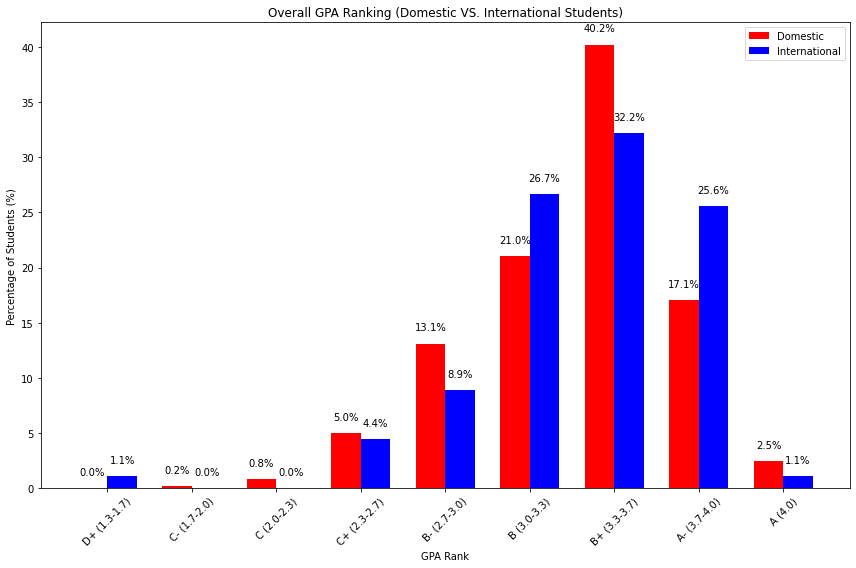

In [47]:
import numpy as np

#Step 1: Categorize the latest GPA for domestic and international students
df_4['GPA_Rank'] = pd.cut(df_4['Latest_Cum_GPA'], bins=bins, labels=labels, include_lowest=True, right=False)
df_5['GPA_Rank'] = pd.cut(df_5['Latest_Cum_GPA'], bins=bins, labels=labels, include_lowest=True, right=False)

#Step 2: Plot bar chart for overall GPA ranking for both sets in percentage
def plot_overall_chart(df_domestic, df_international, title):
    domestic_distribution = df_domestic['GPA_Rank'].value_counts(sort=False)
    international_distribution = df_international['GPA_Rank'].value_counts(sort=False)
    
    #Calculate the percentage
    total_domestic = domestic_distribution.sum()
    total_international = international_distribution.sum()

    domestic_percentage = (domestic_distribution / total_domestic) * 100
    international_percentage = (international_distribution / total_international) * 100
    
    labels = international_distribution.index
    x = np.arange(len(labels))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    bars_domestic = ax.bar(x - width/2, domestic_percentage, width, label='Domestic', color='red')
    bars_international = ax.bar(x + width/2, international_percentage, width, label='International', color='blue')
    
    
    # Add text for the percentages above the bars
    for i, percentage in enumerate(domestic_percentage):
        ax.text(i - width/2, percentage + 1, f'{percentage:.1f}%', ha='center', va='bottom')
    
    for i, percentage in enumerate(international_percentage):
        ax.text(i + width/2, percentage + 1, f'{percentage:.1f}%', ha='center', va='bottom')
    
    ax.set_xlabel('GPA Rank')
    ax.set_ylabel('Percentage of Students (%)')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45)
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
plot_overall_chart(df_4, df_5, 'Overall GPA Ranking (Domestic VS. International Students)')

**<font size="3">4.3.2 GPA Rank Based on School Year</font>**

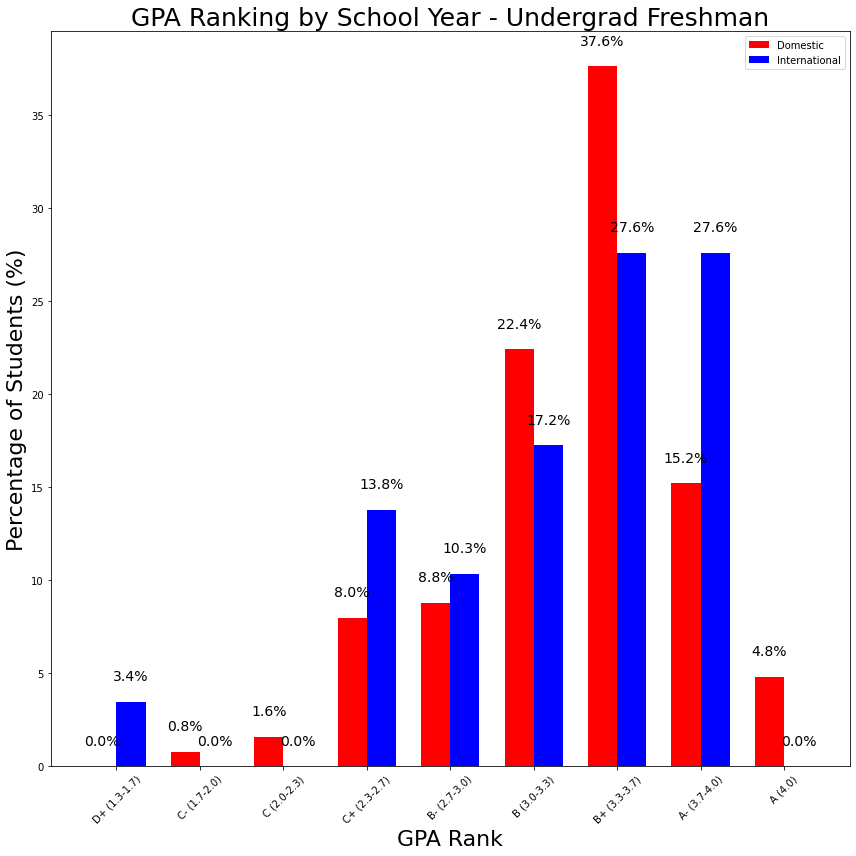

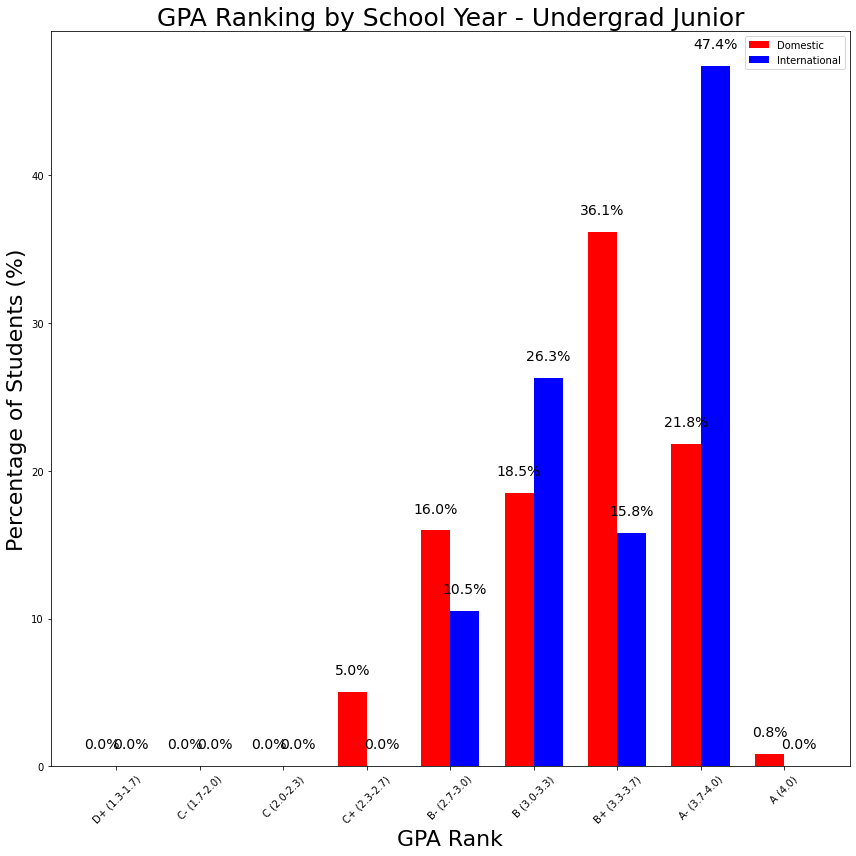

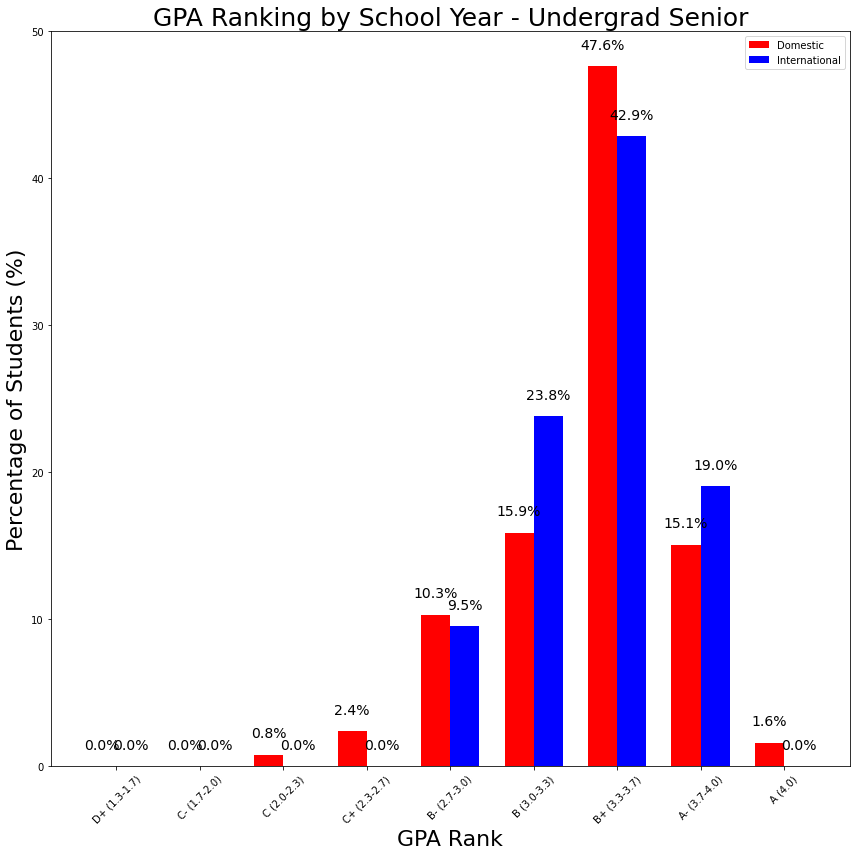

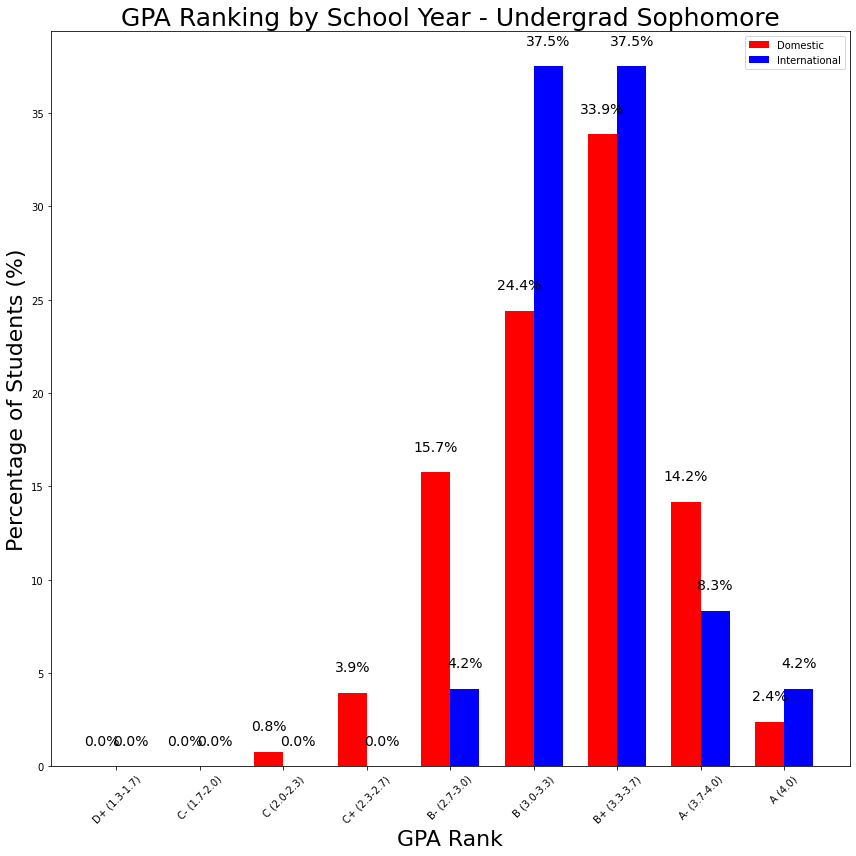

In [61]:
#Step 1: Calculate and plot the percentage distribution of GPA ranks for each school year
def plot_by_school_year(df_domestic, df_international, title):
    #Group by school year
    domestic_grouped = df_domestic.groupby('Class Year Category')
    international_grouped = df_international.groupby('Class Year Category')
    
    #For each school year, calculate the GPA distribution and plot
    for year in domestic_grouped.groups.keys():
        domestic_year_df = domestic_grouped.get_group(year)
        international_year_df = international_grouped.get_group(year) if year in international_grouped.groups else None
        
        domestic_distribution = domestic_year_df['GPA_Rank'].value_counts(sort=False)
        if international_year_df is not None:
            international_distribution = international_year_df['GPA_Rank'].value_counts(sort=False)
        else:
            international_distribution = pd.Series([0]*len(domestic_distribution), index=domestic_distribution.index)
            
        #Calculate Percentage
        total_domestic = domestic_year_df.shape[0]
        total_international = international_year_df.shape[0] if international_year_df is not None else 0
        
        domestic_percentage = (domestic_distribution / total_domestic) * 100
        international_percentage = (international_distribution / total_international) * 100
        
        labels = domestic_distribution.index
        x = np.arange(len(labels))
        width = 0.35
        
        fig, ax = plt.subplots(figsize=(12, 12))
        
        bars_domestic = ax.bar(x - width / 2, domestic_percentage, width, label='Domestic', color='red')
        bars_international = ax.bar(x + width / 2, international_percentage, width, label='International', color='blue')

        # Add text for the percentages above the bars
        for i, percentage in enumerate(domestic_percentage):
            ax.text(i - width / 2, percentage + 1, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=14)

        for i, percentage in enumerate(international_percentage):
            ax.text(i + width / 2, percentage + 1, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=14)

        # Add labels and format the plot
        ax.set_xlabel('GPA Rank', fontsize=22)
        ax.set_ylabel('Percentage of Students (%)', fontsize=22)
        ax.set_title(f'{title} - {year}', fontsize=25)
        ax.set_xticks(x, fontsize=22)
        ax.set_xticklabels(labels, rotation=45)
        ax.legend()
        
        plt.tight_layout()
        plt.show()
        
plot_by_school_year(df_4, df_5, 'GPA Ranking by School Year')

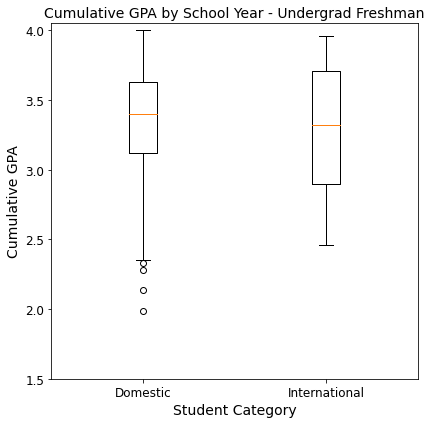

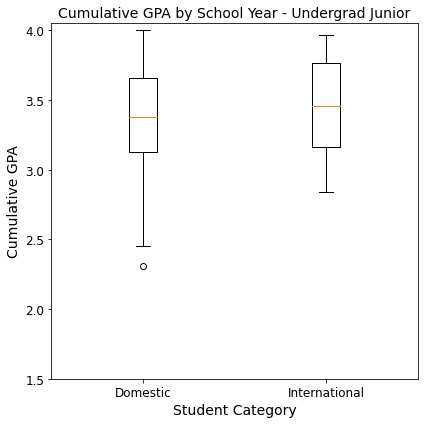

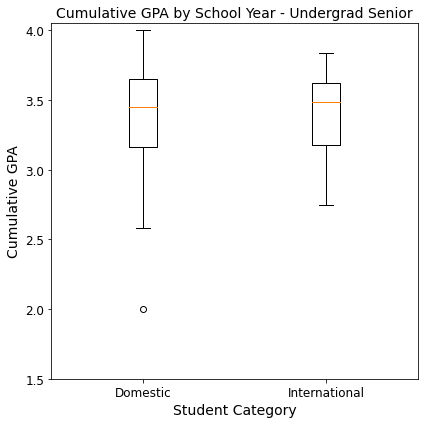

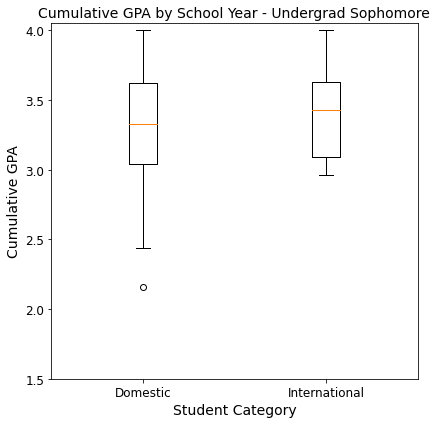

In [54]:
import matplotlib.pyplot as plt

# Function to plot box plots of cumulative GPA by school year for domestic and international students
def plot_boxplot_by_school_year_cumulative_gpa(df_domestic, df_international, title):
    # Group by school year
    domestic_grouped = df_domestic.groupby('Class Year Category')
    international_grouped = df_international.groupby('Class Year Category')
    
    # For each school year, generate a box plot
    for year in domestic_grouped.groups.keys():
        domestic_year_df = domestic_grouped.get_group(year)
        international_year_df = international_grouped.get_group(year) if year in international_grouped.groups else None

        # Collect cumulative GPA data for box plot
        gpa_data = []
        labels = ['Domestic', 'International']  # Labels for box plots
        
        # Get Latest_Cum_GPA for domestic students
        domestic_gpa = domestic_year_df['Latest_Cum_GPA'].dropna()
        gpa_data.append(domestic_gpa)

        # Get Latest_Cum_GPA for international students (add empty data if not available)
        if international_year_df is not None:
            international_gpa = international_year_df['Latest_Cum_GPA'].dropna()
            gpa_data.append(international_gpa)
        else:
            gpa_data.append([])  # Add empty data if international students are missing for this year

        # Plot box plot if there is valid data
        plt.figure(figsize=(6, 6))
        plt.boxplot(gpa_data, labels=labels)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.ylim(1.5, 4.05)
        plt.title(f'{title} - {year}', fontsize=14)
        plt.ylabel('Cumulative GPA', fontsize=14)
        plt.xlabel('Student Category', fontsize=14)
        plt.tight_layout()
        plt.show()

# Usage of the new function
plot_boxplot_by_school_year_cumulative_gpa(df_4, df_5, 'Cumulative GPA by School Year')


**<font size="4">5. How does the academic performance of students with similar HS GPAs compare (those with SAT/ACT vs. those without SAT/ACT score submitted)?</font>**

For this question, we will again use the data with SAT/ACT scores and data without SAT/ACT scores. First, we will group the data by HS GPA ranks. For each HS GPA rank, we will look at the latest cumulative GPA in college. We will calculate the mean, median, range of their college GPA. We will also plot the distribution of college GPA for each HS GPA rank.

**<font size="4">5.1 Range, Mean, Median Comparison</font>**

In [32]:
#Step 1: Load the data
df_6 = pd.read_csv('students_with_ACT_SAT_scores.csv')
df_7 = pd.read_csv('students_without_ACT_SAT_scores.csv')
df_6.head()
df_7.head()

,Student ID & Name,Student Athletic Team 1,Applied To Year Semester,Student Domestic/International Status,Student World Region of Citizenship,Student Home Admission Publication Region,Student Home State,Student Gender,Student IPEDS Race Ethnicity,Student Degree Level,...,Semester 8 GPI,Semester 8 Cum GPA,Semester 9 GPI,Semester 9 Cum GPA,Semester 10 GPI,Semester 10 Cum GPA,Semester 11 GPI,Semester 11 Cum GPA,Semester 12 GPI,Semester 12 Cum GPA
0,2,Quidditch,"Fall, 2023",Domestic,Unknown,Pacific,Broccoli,Male,Asian,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,Ping Pong,"Fall, 2022",Domestic,Unknown,New England,Grapefruit,Female,Hispanic/Latino,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Bowling,"Fall, 2022",Domestic,Unknown,Mid-Atlantic,Lemon,Female,White,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,Curling,"Fall, 2023",Domestic,Unknown,Mid-Atlantic,Blueberry,Male,African American or Black,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Handball,"Fall, 2023",Domestic,Unknown,Pacific,Broccoli,Female,White,UNDERGRAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Step 2: Drop any rows that don't have High School GPA
df_6 = df_6.dropna(subset=['Average Undergraduate Applicant High School GPA'])
df_7 = df_7.dropna(subset=['Average Undergraduate Applicant High School GPA'])

#Step 3: Cap the High School GPA to a maximum of 4.0
df_6['Average Undergraduate Applicant High School GPA'] = df_6['Average Undergraduate Applicant High School GPA'].clip(upper=4.0)
df_7['Average Undergraduate Applicant High School GPA'] = df_7['Average Undergraduate Applicant High School GPA'].clip(upper=4.0)

#Step 4: Define GPA bins and labels for ranking
bins = [1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0, 4.1]
labels = ['D+ (1.3-1.7)', 'C- (1.7-2.0)', 'C (2.0-2.3)', 'C+ (2.3-2.7)',
          'B- (2.7-3.0)', 'B (3.0-3.3)', 'B+ (3.3-3.7)', 'A- (3.7-4.0)', 'A (4.0)']

#Step 5: Bin the High School GPA for both datasets
df_6['HS_GPA_Rank'] = pd.cut(df_6['Average Undergraduate Applicant High School GPA'], bins=bins, labels=labels, include_lowest=True, right=False)
df_7['HS_GPA_Rank'] = pd.cut(df_7['Average Undergraduate Applicant High School GPA'], bins=bins, labels=labels, include_lowest=True, right=False)

#Step 6: Get the latest cumulative college GPA
df_6['Latest_Cum_GPA'] = df_6.apply(get_latest_cum_gpa, axis=1)
df_7['Latest_Cum_GPA'] = df_7.apply(get_latest_cum_gpa, axis=1)

In [38]:
# Step 7: Define a function to calculate mean, median, range, and count for cumulative GPA
def calculate_gpa_stats(df):
    gpa_stats = df.groupby('HS_GPA_Rank')['Latest_Cum_GPA'].agg(
        mean='mean', 
        median='median', 
        min='min', 
        max='max', 
        count='size'  # Count the number of students in each GPA rank
    )
    gpa_stats['range'] = gpa_stats['max'] - gpa_stats['min']
    return gpa_stats.round(2)

# Step 8: Calculate GPA stats for both datasets
with_scores_stats = calculate_gpa_stats(df_6)
without_scores_stats = calculate_gpa_stats(df_7)

with_scores_stats, without_scores_stats

(              mean  median   min   max  count  range
 HS_GPA_Rank                                         
 D+ (1.3-1.7)   NaN     NaN   NaN   NaN      0    NaN
 C- (1.7-2.0)   NaN     NaN   NaN   NaN      0    NaN
 C (2.0-2.3)    NaN     NaN   NaN   NaN      0    NaN
 C+ (2.3-2.7)   NaN     NaN   NaN   NaN      0    NaN
 B- (2.7-3.0)  2.81    2.81  2.74  2.88      2   0.14
 B (3.0-3.3)   3.11    3.10  2.70  3.64     18   0.94
 B+ (3.3-3.7)  3.29    3.40  2.31  3.88     49   1.57
 A- (3.7-4.0)  3.40    3.44  2.00  3.98     88   1.98
 A (4.0)       3.59    3.64  2.53  4.00    104   1.47,
               mean  median   min   max  count  range
 HS_GPA_Rank                                         
 D+ (1.3-1.7)   NaN     NaN   NaN   NaN      0    NaN
 C- (1.7-2.0)   NaN     NaN   NaN   NaN      0    NaN
 C (2.0-2.3)    NaN     NaN   NaN   NaN      0    NaN
 C+ (2.3-2.7)  3.22    3.22  3.21  3.23      2   0.02
 B- (2.7-3.0)  3.04    2.94  2.68  3.58      4   0.90
 B (3.0-3.3)   3.17    3.18

**<font size="4">5.2 Visualize Data using Tables</font>**

In [35]:
# Step 1: Create a dictionary using the calculated data (Mean, Median, Range)
with_scores_data = {
    'C+ (2.3-2.7)': [with_scores_stats.loc['C+ (2.3-2.7)', 'min'], with_scores_stats.loc['C+ (2.3-2.7)', 'max'], with_scores_stats.loc['C+ (2.3-2.7)', 'mean'], with_scores_stats.loc['C+ (2.3-2.7)', 'median']],
    'B- (2.7-3.0)': [with_scores_stats.loc['B- (2.7-3.0)', 'min'], with_scores_stats.loc['B- (2.7-3.0)', 'max'], with_scores_stats.loc['B- (2.7-3.0)', 'mean'], with_scores_stats.loc['B- (2.7-3.0)', 'median']],
    'B (3.0-3.3)': [with_scores_stats.loc['B (3.0-3.3)', 'min'], with_scores_stats.loc['B (3.0-3.3)', 'max'], with_scores_stats.loc['B (3.0-3.3)', 'mean'], with_scores_stats.loc['B (3.0-3.3)', 'median']],
    'B+ (3.3-3.7)': [with_scores_stats.loc['B+ (3.3-3.7)', 'min'], with_scores_stats.loc['B+ (3.3-3.7)', 'max'], with_scores_stats.loc['B+ (3.3-3.7)', 'mean'], with_scores_stats.loc['B+ (3.3-3.7)', 'median']],
    'A- (3.7-4.0)': [with_scores_stats.loc['A- (3.7-4.0)', 'min'], with_scores_stats.loc['A- (3.7-4.0)', 'max'], with_scores_stats.loc['A- (3.7-4.0)', 'mean'], with_scores_stats.loc['A- (3.7-4.0)', 'median']],
    'A (4.0)': [with_scores_stats.loc['A (4.0)', 'min'], with_scores_stats.loc['A (4.0)', 'max'], with_scores_stats.loc['A (4.0)', 'mean'], with_scores_stats.loc['A (4.0)', 'median']]
}

without_scores_data = {
    'C+ (2.3-2.7)': [without_scores_stats.loc['C+ (2.3-2.7)', 'min'], without_scores_stats.loc['C+ (2.3-2.7)', 'max'], without_scores_stats.loc['C+ (2.3-2.7)', 'mean'], without_scores_stats.loc['C+ (2.3-2.7)', 'median']],
    'B- (2.7-3.0)': [without_scores_stats.loc['B- (2.7-3.0)', 'min'], without_scores_stats.loc['B- (2.7-3.0)', 'max'], without_scores_stats.loc['B- (2.7-3.0)', 'mean'], without_scores_stats.loc['B- (2.7-3.0)', 'median']],
    'B (3.0-3.3)': [without_scores_stats.loc['B (3.0-3.3)', 'min'], without_scores_stats.loc['B (3.0-3.3)', 'max'], without_scores_stats.loc['B (3.0-3.3)', 'mean'], without_scores_stats.loc['B (3.0-3.3)', 'median']],
    'B+ (3.3-3.7)': [without_scores_stats.loc['B+ (3.3-3.7)', 'min'], without_scores_stats.loc['B+ (3.3-3.7)', 'max'], without_scores_stats.loc['B+ (3.3-3.7)', 'mean'], without_scores_stats.loc['B+ (3.3-3.7)', 'median']],
    'A- (3.7-4.0)': [without_scores_stats.loc['A- (3.7-4.0)', 'min'], without_scores_stats.loc['A- (3.7-4.0)', 'max'], without_scores_stats.loc['A- (3.7-4.0)', 'mean'], without_scores_stats.loc['A- (3.7-4.0)', 'median']],
    'A (4.0)': [without_scores_stats.loc['A (4.0)', 'min'], without_scores_stats.loc['A (4.0)', 'max'], without_scores_stats.loc['A (4.0)', 'mean'], without_scores_stats.loc['A (4.0)', 'median']]
}

# Step 2: Create DataFrames
columns = ['Range Min', 'Range Max', 'Mean', 'Median']
with_scores_df = pd.DataFrame.from_dict(with_scores_data, orient='index', columns=columns)
without_scores_df = pd.DataFrame.from_dict(without_scores_data, orient='index', columns=columns)

#Step 4: Display the tables
print("With SAT/ACT scores")
with_scores_df

With SAT/ACT scores


,Range Min,Range Max,Mean,Median
C+ (2.3-2.7),NaN,NaN,NaN,NaN
B- (2.7-3.0),2.74,2.88,2.81,2.81
B (3.0-3.3),2.70,3.64,3.11,3.10
B+ (3.3-3.7),2.31,3.88,3.29,3.40
A- (3.7-4.0),2.00,3.98,3.40,3.44
A (4.0),2.53,4.00,3.59,3.64


In [36]:
#Display the Mean Table
print("\nWithout SAT/ACT scores")
without_scores_df


Without SAT/ACT scores


,Range Min,Range Max,Mean,Median
C+ (2.3-2.7),3.21,3.23,3.22,3.22
B- (2.7-3.0),2.68,3.58,3.04,2.94
B (3.0-3.3),2.79,3.55,3.17,3.18
B+ (3.3-3.7),2.14,3.86,3.13,3.12
A- (3.7-4.0),1.99,4.00,3.26,3.31
A (4.0),2.52,4.00,3.44,3.45


**<font size="4">5.3 Distribution of College GPA based on HS GPA Rank</font>**

In [40]:
#Step 1: Define GPA bins and labels for ranking
bins = [1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0, 4.1]
labels = ['D+ (1.3-1.7)', 'C- (1.7-2.0)', 'C (2.0-2.3)', 'C+ (2.3-2.7)',
          'B- (2.7-3.0)', 'B (3.0-3.3)', 'B+ (3.3-3.7)', 'A- (3.7-4.0)', 'A (4.0)']

#Step 2: Bin the college GPA for both datasets
df_6['College_GPA_Rank'] = pd.cut(df_6['Latest_Cum_GPA'], bins=bins, labels=labels, include_lowest=True, right=False)
df_7['College_GPA_Rank'] = pd.cut(df_7['Latest_Cum_GPA'], bins=bins, labels=labels, include_lowest=True, right=False)

#Step 3: Function to calculate percentage distribution for college GPA
def calculate_gpa_distribution(df, hs_gpa_rank):
    gpa_distribution = df[df['HS_GPA_Rank'] == hs_gpa_rank].groupby('College_GPA_Rank').size()
    total_students = gpa_distribution.sum()
    return (gpa_distribution / total_students) * 100

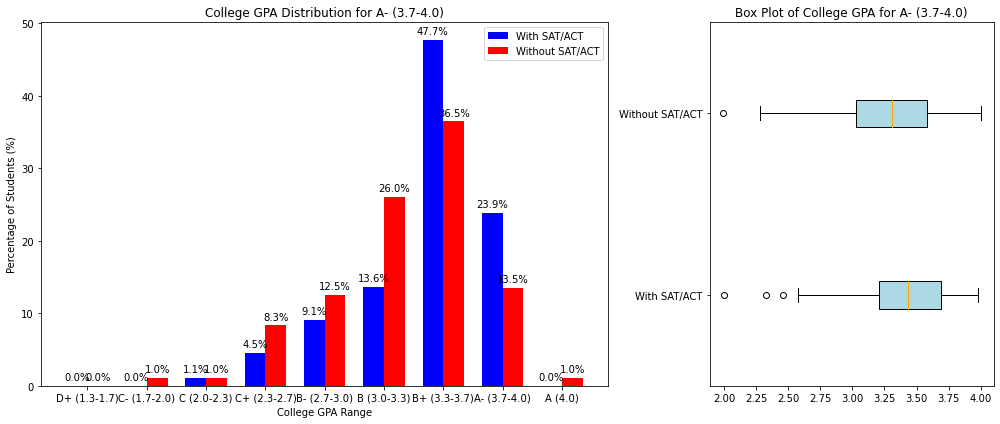

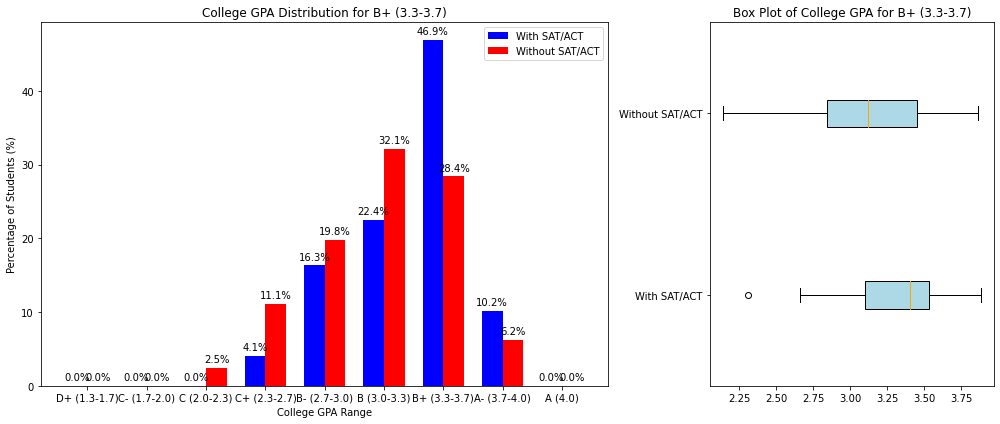

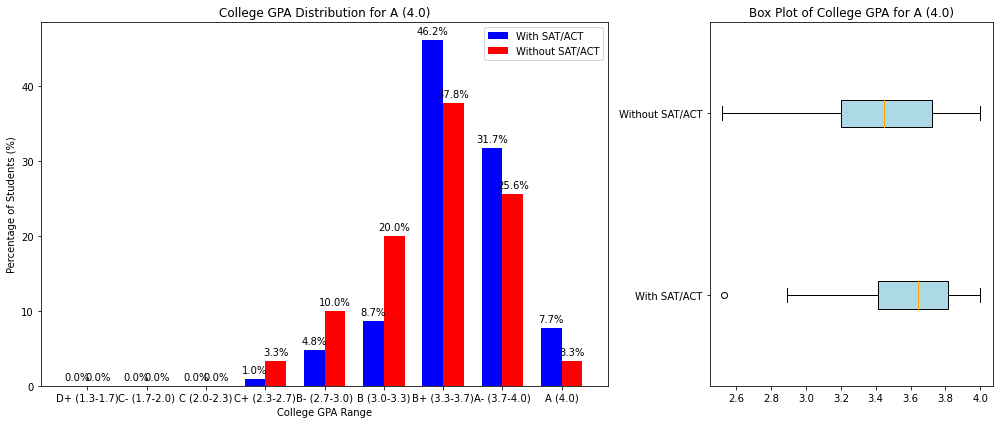

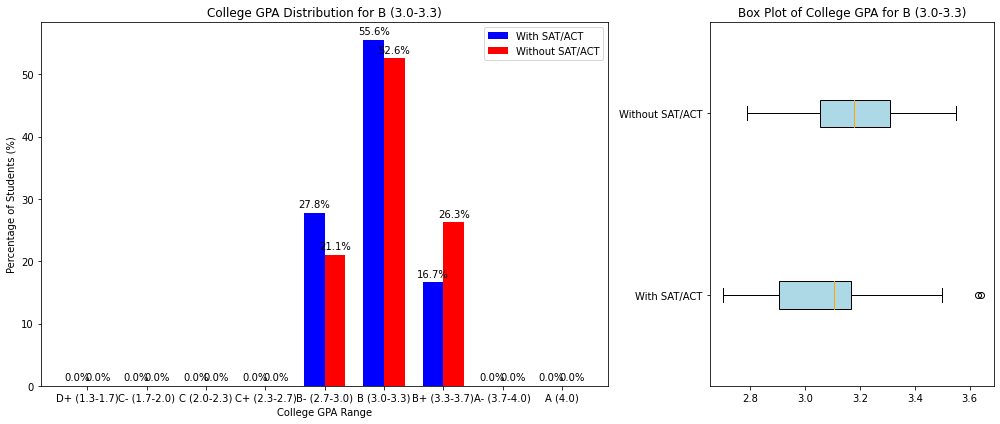

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


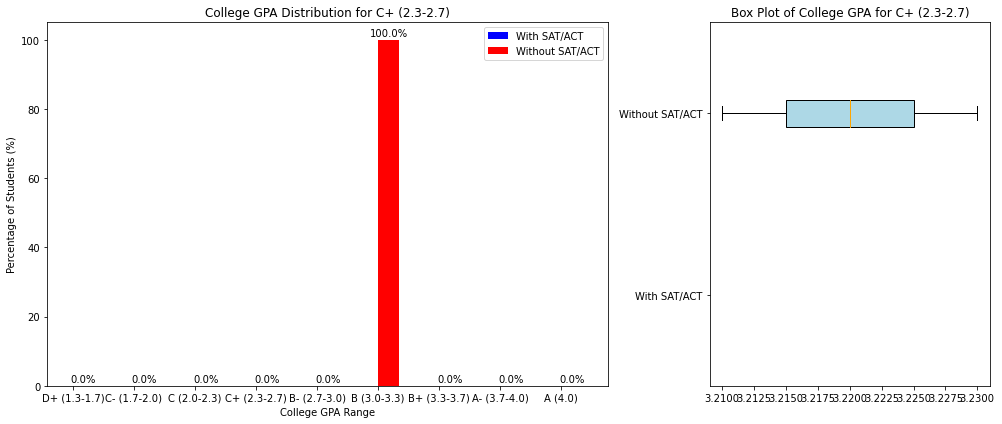

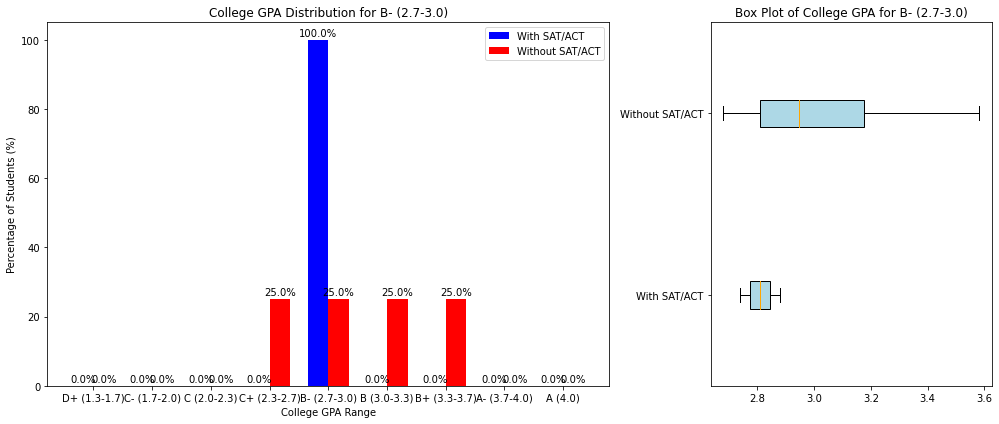

In [42]:
#Step 4: Plot Box Plot for each HS GPA Rank
def plot_gpa_distribution_and_boxplot(hs_gpa_rank):
    # Calculate percentage distribution for students with and without ACT/SAT scores
    with_score_distribution = calculate_gpa_distribution(df_6, hs_gpa_rank)
    without_score_distribution = calculate_gpa_distribution(df_7, hs_gpa_rank)
    
    labels = with_score_distribution.index
    x = np.arange(len(labels))
    width = 0.35
    
    # Create the bar chart for distribution
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})
    
    bars_with_scores = ax[0].bar(x - width/2, with_score_distribution, width, label='With SAT/ACT', color='blue')
    bars_without_scores = ax[0].bar(x + width/2, without_score_distribution, width, label='Without SAT/ACT', color='red')
    
    # Add percentage labels on top of each bar
    for i, percentage in enumerate(with_score_distribution):
        ax[0].text(i - width/2, percentage + 0.5, f'{percentage:.1f}%', ha='center', va='bottom')

    for i, percentage in enumerate(without_score_distribution):
        ax[0].text(i + width/2, percentage + 0.5, f'{percentage:.1f}%', ha='center', va='bottom')

    # Add labels and formatting for bar chart
    ax[0].set_xlabel('College GPA Range')
    ax[0].set_ylabel('Percentage of Students (%)')
    ax[0].set_title(f'College GPA Distribution for {hs_gpa_rank}')
    ax[0].set_xticks(x)
    ax[0].set_xticklabels(labels)
    ax[0].legend()
    
    # Box Plot for comparison between with and without SAT/ACT scores
    # Filter the data for the current HS GPA rank
    with_scores_data = df_6[df_6['HS_GPA_Rank'] == hs_gpa_rank]['Latest_Cum_GPA']
    without_scores_data = df_7[df_7['HS_GPA_Rank'] == hs_gpa_rank]['Latest_Cum_GPA']
    
    # Create side-by-side box plots
    ax[1].boxplot([with_scores_data.dropna(), without_scores_data.dropna()], 
                  vert=False, patch_artist=True, 
                  labels=['With SAT/ACT', 'Without SAT/ACT'],
                  boxprops=dict(facecolor='lightblue', color='black'),
                  medianprops=dict(color='orange'))
    
    # Add title for box plot
    ax[1].set_title(f'Box Plot of College GPA for {hs_gpa_rank}')
    
    plt.tight_layout()
    plt.show()

for rank in df_7['HS_GPA_Rank'].unique():
    plot_gpa_distribution_and_boxplot(rank)